# Observations
1. There seems to be a positive correlation between the weight of the mouse and the volume of the tumor.  The less the mouse weighs, the smaller the volume size of the tumor.  
2. However, it would be interesting to know if the age of the mouse matters in the volume of the tumor.  For example, if the mouse is younger, would the tumor volume be larger?
3. Based on the data, Capomulin and Ramicane seem to be the more effective drug regimen for the decrease in tumor volume.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_study_df = pd.merge(mouse_metadata, study_results, how = "right", on = ["Mouse ID", "Mouse ID"])



# Display the data table for preview
complete_study_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [28]:
# Checking the number of mice.
Mice_count =  len(complete_study_df['Mouse ID'].unique())
Mice_count

249

In [29]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicates = complete_study_df.loc[complete_study_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

Duplicates

array(['g989'], dtype=object)

In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
complete_clean_study_df = complete_study_df[complete_study_df['Mouse ID'].isin(Duplicates)==False] 

complete_clean_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [31]:
# Checking the number of mice in the clean DataFrame.
Mice_count_clean = len(complete_clean_study_df['Mouse ID'].unique())
Mice_count_clean

248

# Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

average_tumor_volume = complete_clean_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor_volume = complete_clean_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_variance = complete_clean_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_std = complete_clean_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_stderr = complete_clean_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
Summary_stats = pd.DataFrame({"Mean Tumor Volume": average_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": tumor_variance,
    "Tumor Volume Std. Dev.": tumor_std,
    "Tumor Volume Std. Err.": tumor_stderr
                                })

Summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

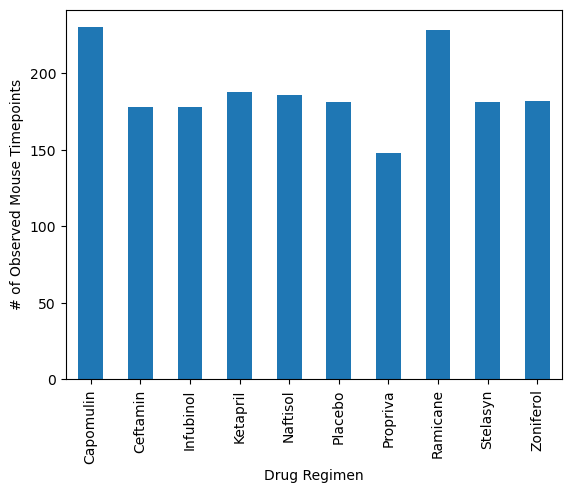

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Total_rows = complete_clean_study_df.groupby('Drug Regimen').size()
Total_rows.plot(kind='bar',  x='Drug Regimen', y='Timepoint')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

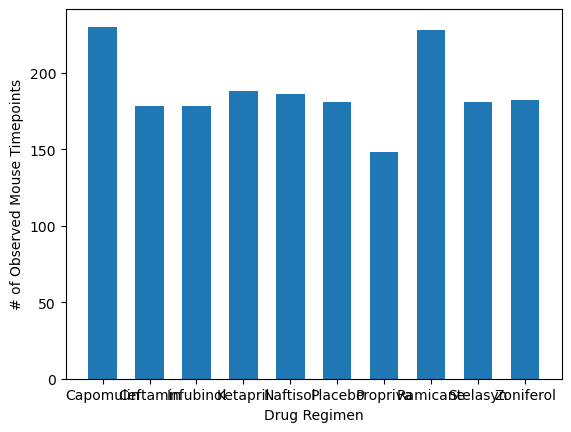

In [34]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(Total_rows.index, Total_rows.values, width=0.6)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()


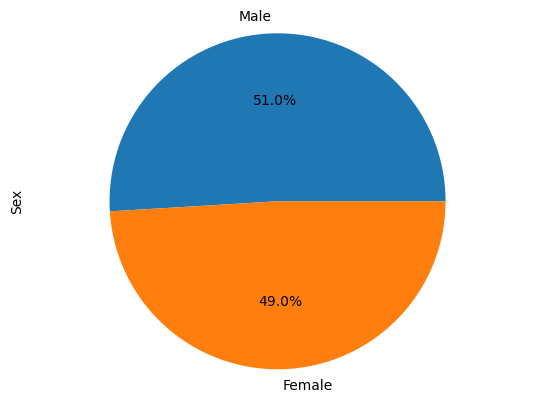

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Mice_gender = complete_clean_study_df['Sex'].value_counts()
Mice_pie = Mice_gender.plot(kind="pie", y='Sex', autopct='%1.1f%%')
Mice_pie.set_ylabel("Sex")
plt.axis("equal")
plt.show()

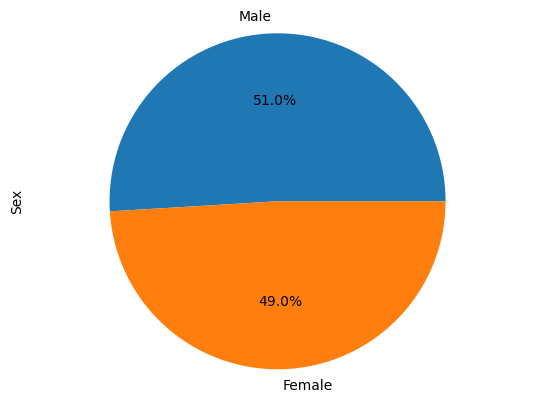

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.ylabel("Sex")
labels = ["Male", "Female"]
plt.pie(Mice_gender, labels=labels, autopct="%1.1f%%")
plt.axis("equal")
plt.show()

# Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Volume_by_regimen = complete_clean_study_df[complete_clean_study_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
Volume_by_regimen.groupby('Mouse ID')['Tumor Volume (mm3)'].last()

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = complete_clean_study_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(Volume_by_regimen, last_timepoint, how="right")
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,n364,Ramicane,Male,4,17,45,31.095335,1
1,b128,Capomulin,Female,9,22,45,38.982878,2
2,l661,Ceftamin,Male,18,26,45,59.851956,3
3,y865,Ceftamin,Male,23,26,45,64.729837,3
4,y769,Ceftamin,Female,6,27,45,68.594745,4
...,...,...,...,...,...,...,...,...
18082,a644,Ramicane,Female,7,17,45,32.978522,1
18083,i177,Ramicane,Male,10,18,45,33.562402,3
18084,r944,Capomulin,Male,12,25,45,41.581521,2
18085,u364,Capomulin,Male,18,17,45,31.023923,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
Treatment_list = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]

    
# Create empty list to fill with tumor vol data (for plotting)
list = []
for x in list:
    list.append(x)
    print(x)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merged_data['Tumor Volume (mm3)'].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]

    # Locate the rows which contain mice on each drug and get the tumor volumes
Volume_data = Volume_by_regimen.groupby(['Mouse ID']).agg({'Tumor Volume (mm3)': 'mean'}).reset_index()
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
print(f"The lower quartile of Tumor Volume is: {quartiles[0.25]}")
print(f"The upper quartile of Tumor Volume is: {quartiles[0.75]}")
print(f"The interquartile range of Tumor Volume is: {iqr}")

lower_bound = quartiles[0.25] - (1.5*iqr)
upper_bound = quartiles[0.75] + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Tumor Volume is: 37.61401068
The upper quartile of Tumor Volume is: 53.18065678
The interquartile range of Tumor Volume is: 15.5666461
Values below 14.26404153 could be outliers.
Values above 76.53062593 could be outliers.


,Mouse ID,Tumor Volume (mm3)
0,a203,56.312708
1,a251,55.237095
2,a275,52.770965
3,a411,40.701385
4,a444,43.060052
...,...,...
95,y769,56.290887
96,y793,38.506829
97,y865,54.998559
98,z578,38.411510


In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


fig1, ax1 = plt.subplots()
ax1.set_title('Distribution of Tumor Volume per Treatment')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(Volume_data)
plt.show()

# Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

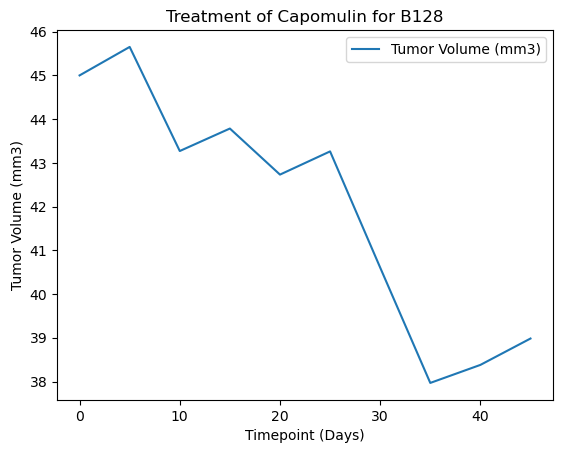

In [38]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Specific_drug_df = complete_clean_study_df[complete_clean_study_df['Drug Regimen'] == 'Capomulin']
Unique_mice_df = Specific_drug_df[Specific_drug_df['Mouse ID'] == 'b128']
Unique_mice_df.plot(x='Timepoint', y='Tumor Volume (mm3)', kind='line')
plt.title("Treatment of Capomulin for B128")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

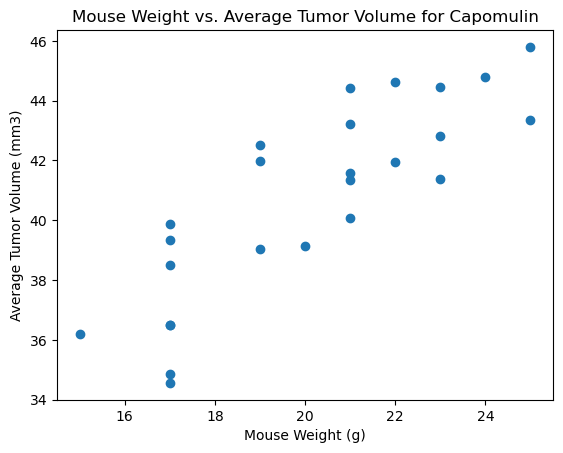

In [39]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Specific_drug_df = complete_clean_study_df[complete_clean_study_df['Drug Regimen'] == 'Capomulin']
Cap_data = Specific_drug_df.groupby(['Mouse ID']).agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'}).reset_index()

plt.scatter(Cap_data['Weight (g)'], Cap_data['Tumor Volume (mm3)'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin')
plt.show()

# Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


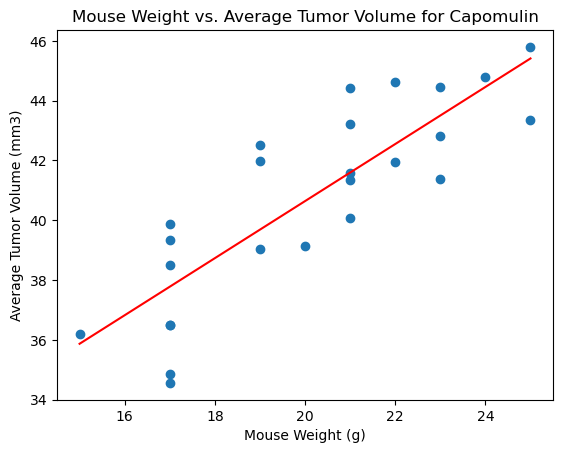

In [40]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight = Cap_data['Weight (g)']
tumor_volume = Cap_data['Tumor Volume (mm3)']
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(mouse_weight,tumor_volume)[0],2)}")

# Plot the linear regression model on top of the previous scatter plot.
plt.scatter(Cap_data['Weight (g)'], Cap_data['Tumor Volume (mm3)'])
slope, intercept, r_value, p_value, std_err = linregress(Cap_data['Weight (g)'], Cap_data ['Tumor Volume (mm3)'])
x = np.array([min(Cap_data['Weight (g)']), max(Cap_data['Weight (g)'])])
y = slope * x + intercept
plt.plot(x, y, color='red')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin')
plt.show()